## HOJA DE TRABAJO 8 - REDES NEURONALES

In [1]:
# Importando librerias necesarias

import matplotlib.pyplot as plt
import numpy as np
import random
import time
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor


#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

### Preparación de datos

In [2]:
# Cargando dataset con pandas
data = pd.read_csv('train.csv')
data = pd.DataFrame(data)


# Limpieza de datos
columns_used = []

data['neighborhood'] = 0
NEIGHBORHOOD = list(set(nh for nh in data['Neighborhood']))
for index, neighborhood_name in enumerate(NEIGHBORHOOD):
    data.loc[data['Neighborhood'] == neighborhood_name, 'neighborhood'] = index + 1
columns_used.append('neighborhood')

data['houseStyle'] = 0
HOUSE_STYLE = list(set(hs for hs in data['HouseStyle']))
for index, houseStyle_name in enumerate(HOUSE_STYLE):
    data.loc[data['HouseStyle'] == houseStyle_name, 'houseStyle'] = index + 1
columns_used.append('houseStyle')

data['houseZone'] = 0
MS_ZONING = list(set(msz for msz in data['MSZoning']))
for index, MSZoning_name in enumerate(MS_ZONING):
    data.loc[data['MSZoning'] == MSZoning_name, 'houseZone'] = index + 1
columns_used.append('houseZone')

data['houseUtilities'] = 0
UTILITIES = list(set(u for u in data['Utilities']))
for index, utils in enumerate(UTILITIES):
    data.loc[data['Utilities'] == utils, 'houseUtilities'] = index + 1
columns_used.append('houseUtilities')

data['roadAccess'] = 0
CONDITION_1 = list(set(c1 for c1 in data['Condition1']))
for index, c1 in enumerate(CONDITION_1):
    data.loc[data['Condition1'] == c1, 'roadAccess'] = index + 1
columns_used.append('roadAccess')

data['remodelated'] = 0
data.loc[data['YearBuilt'] != data['YearRemodAdd'], 'remodelated'] = 1
columns_used.append('remodelated')

data['roofStyle'] = 0
ROOF_STYLE = list(set(rs for rs in data['RoofStyle']))
for index, rs in enumerate(ROOF_STYLE):
    data.loc[data['RoofStyle'] == rs, 'roofStyle'] = index + 1
columns_used.append('roofStyle')

data['roofMaterial'] = 0
ROOF_MATL = list(set(rm for rm in data['RoofMatl']))
for index, rm in enumerate(ROOF_MATL):
    data.loc[data['RoofMatl'] == rm, 'roofMaterial'] = index + 1
columns_used.append('roofMaterial')

data['exteriorCondition'] = 0
EXTER_COND = list(set(ec for ec in data['ExterCond']))
for index, ec in enumerate(EXTER_COND):
    data.loc[data['ExterCond'] == ec, 'exteriorCondition'] = index + 1
columns_used.append('exteriorCondition')

data['foundationMaterial'] = 0
FOUNDATION = list(set(f for f in data['Foundation']))
for index, f in enumerate(FOUNDATION):
    data.loc[data['Foundation'] == f, 'foundationMaterial'] = index + 1
columns_used.append('foundationMaterial')

data['basement'] = 0
data.loc[~data['BsmtQual'].isna(), 'basement'] = 1
columns_used.append('basement')

data['basementCondition'] = 1
data.loc[data['BsmtCond'] == "Ex", 'basementCondition'] = 3
data.loc[data['BsmtCond'] == "Gd", 'basementCondition'] = 2
data.loc[data['BsmtCond'].isna(), 'basementCondition'] = 0
columns_used.append('basementCondition')

data['fireplace'] = 0
data.loc[~data['FireplaceQu'].isna(), 'fireplace'] = 1
columns_used.append('fireplace')

data['pool'] = 0
data.loc[~data['PoolQC'].isna(), 'pool'] = 1
columns_used.append('pool')

data['additionalFeature'] = 0
data.loc[~data['MiscFeature'].isna(), 'additionalFeature'] = 1
columns_used.append('additionalFeature')

data['saleType'] = 0
SALE_TYPE = list(set(st for st in data['SaleType']))
for index, st in enumerate(SALE_TYPE):
    data.loc[data['SaleType'] == st, 'saleType'] = index + 1
columns_used.append('saleType')

data['overallQuality'] = data['OverallQual']
columns_used.append('overallQuality')

data['overallCondition'] = data['OverallCond']
columns_used.append('overallCondition')

data['livingArea'] = data['GrLivArea']
columns_used.append('livingArea')

data['yearBuilt'] = data['YearBuilt']
columns_used.append('yearBuilt')

data['salePrice'] = data['SalePrice']
columns_used.append('salePrice')

columns_not_used = [x for x in data.columns if x not in columns_used]
data = data.drop(columns_not_used, axis=1)

data.head()


,neighborhood,houseStyle,houseZone,houseUtilities,roadAccess,remodelated,roofStyle,roofMaterial,exteriorCondition,foundationMaterial,...,basementCondition,fireplace,pool,additionalFeature,saleType,overallQuality,overallCondition,livingArea,yearBuilt,salePrice
0,1,4,4,2,4,0,5,6,2,1,...,1,0,0,0,7,7,5,1710,2003,208500
1,14,5,4,2,2,0,5,6,2,3,...,1,1,0,0,7,6,8,1262,1976,181500
2,1,4,4,2,4,1,5,6,2,1,...,1,1,0,0,7,7,5,1786,2001,223500
3,23,4,4,2,4,1,5,6,2,4,...,2,1,0,0,7,7,5,1717,1915,140000
4,18,4,4,2,4,0,5,6,2,1,...,1,1,0,0,7,8,5,2198,2000,250000


### 2. Variable respuesta - Categorización por precios

In [3]:
cheap_cut = data['salePrice'].quantile(0.25)
expensive_cut = data['salePrice'].quantile(0.75)

data['economy'] = 0
data.loc[data['salePrice'] < cheap_cut, 'economy'] = 'barata'
data.loc[data['salePrice'] > expensive_cut, 'economy'] = 'cara'
data.loc[(data['salePrice'] >= cheap_cut) & (data['salePrice'] <= expensive_cut), 'economy'] = 'media'

data.head()

,neighborhood,houseStyle,houseZone,houseUtilities,roadAccess,remodelated,roofStyle,roofMaterial,exteriorCondition,foundationMaterial,...,fireplace,pool,additionalFeature,saleType,overallQuality,overallCondition,livingArea,yearBuilt,salePrice,economy
0,1,4,4,2,4,0,5,6,2,1,...,0,0,0,7,7,5,1710,2003,208500,media
1,14,5,4,2,2,0,5,6,2,3,...,1,0,0,7,6,8,1262,1976,181500,media
2,1,4,4,2,4,1,5,6,2,1,...,1,0,0,7,7,5,1786,2001,223500,cara
3,23,4,4,2,4,1,5,6,2,4,...,1,0,0,7,7,5,1717,1915,140000,media
4,18,4,4,2,4,0,5,6,2,1,...,1,0,0,7,8,5,2198,2000,250000,cara


### 1. Partición en conjuntos de entrenamiento y prueba

In [4]:
## Dividir el dataset en train y test

# Dividir el dataset en X e y
X = data.drop(['salePrice', 'economy'], axis=1)
y = data['economy']

# 30% de los datos para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=123)

### 3. Generación de modelos para clasificar usando variable respuesta
Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener diferentes topologías y funciones de activación.

#### Normalización de los datos

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creación de modelo 1

In [6]:
# Modelo 1
start_time_mlp1 = time.time()
mlp1 = MLPClassifier(hidden_layer_sizes=(10,)*2, max_iter=3000, activation='relu', random_state=123)
history1 = mlp1.fit(X_train, y_train)
total_time_mlp1 = time.time() - start_time_mlp1

#### Creación del modelo 2

In [7]:
# Modelo 2
start_time_mlp2 = time.time()
mlp2 = MLPClassifier(hidden_layer_sizes=(10,)*4, max_iter=3000, activation='tanh', random_state=123)
history2 = mlp2.fit(X_train, y_train)
total_time_mlp2 = time.time() - start_time_mlp2

### 4. Predicción de la variable respuesta

In [8]:
# Predicciones
y_pred1 = mlp1.predict(X_test)
y_pred2 = mlp2.predict(X_test)

### 5. Matrices de confusión

In [9]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1_accuracy = accuracy_score(y_test, y_pred1)
cm1_precision = precision_score(y_test, y_pred1, average='macro')
cm1_recall = recall_score(y_test, y_pred1, average='macro')

cm2 = confusion_matrix(y_test, y_pred2)
cm2_accuracy = accuracy_score(y_test, y_pred2)
cm2_precision = precision_score(y_test, y_pred2, average='macro')
cm2_recall = recall_score(y_test, y_pred2, average='macro')

print(f"Matriz de confusión del modelo 1\n{cm1}\nExactitud: {cm1_accuracy}\nPrecisión: {cm1_precision}\nSensitividad: {cm1_recall}\nTiempo: {total_time_mlp1} segundos\n")
print(f"Matriz de confusión del modelo 2\n{cm2}\nExactitud: {cm2_accuracy}\nPrecisión: {cm2_precision}\nSensitividad: {cm2_recall}\nTiempo: {total_time_mlp2} segundos")


Matriz de confusión del modelo 1
[[ 76   0  22]
 [  0  93  26]
 [ 23  13 185]]
Exactitud: 0.8082191780821918
Precisión: 0.8130088915172727
Sensitividad: 0.7980422938406132
Tiempo: 1.8771593570709229 segundos

Matriz de confusión del modelo 2
[[ 72   0  26]
 [  1  91  27]
 [ 21  16 184]]
Exactitud: 0.7922374429223744
Precisión: 0.7975986815150048
Sensitividad: 0.7773263151414412
Tiempo: 2.773872137069702 segundos


### 6. Comparación de resultados 
A pesar de que el modelo 2 tubo una mayor cantidad de capas ocultas este proveyó una menor exactitud, precisión y sensitividad al momento de predecir en comparación con el modelo 1. Se sabe que una mayor cantidad de capas en una red neuronal da una mayor complejidad al modelo y por ende la posibilidad de obtener mejores resultados en la predicción de datos. Por tanto, se puede intuir que la función de activación relu (unidad lineal rectificada) de la forma f(x) = max(0, x) en un modelo de redes neuronales nos provee mejores resultados que la función de activación f(x) = tanh(x). Por otra parte, se considera al modelo 2 es menos eficiente dado que además fue necesario más tiempo para generar el modelo. No obstante, los resultados para ambos modelos de exactitud, precisión y sensibilidad se consideran aceptables.


### 7 - Analizando sobreajuste
A continuación se puede observar gráficamente que no hay sobreajuste en el modelo dado que los scores de training y test permanecen relativamente cerca.

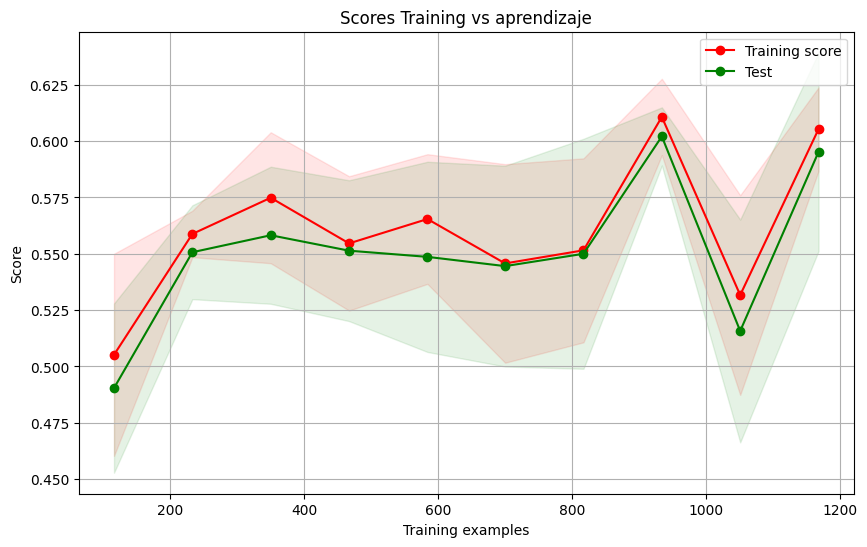

In [10]:
train_sizes, train_scores, test_scores = learning_curve(
        mlp1, X, y, train_sizes=np.linspace(0.1, 1.0, 10))
    
plt.figure(figsize=(10, 6))
plt.title("Scores Training vs aprendizaje")
plt.xlabel("Training examples")
plt.ylabel("Score")
    
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Test ")
plt.legend(loc="best")
plt.show()

### 8 - Tuneando parametros
Utilizamos el modelo 1.
El mejor modelo al tunear los parametros tiene un accuracy de 0.794. Esto significa que el modelo 1 anterior sigue siendo el mejor.

In [11]:
print(mlp1.get_params().keys())
param_grid = {
    'hidden_layer_sizes': [(10,)*2,(14,)*2],
    'max_iter': [10000, 15000],
    'activation': ['relu']
}

mlp1 = MLPClassifier(random_state=123)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(mlp1, param_grid)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Best hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': (14, 14), 'max_iter': 10000}
Best accuracy:  0.8011669057867049


### 9 - Utilizando salePrice

In [12]:
X = data.drop(['salePrice', 'economy'], axis=1)
y = data['salePrice']

# 30% de los datos para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=123)


scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### 10 - Creando modelos

In [13]:
# Modelo 1
start_time_r1 = time.time()
regressor1 = MLPRegressor(hidden_layer_sizes=(10,)*2, max_iter=10000, activation='identity', random_state=222,
                         validation_fraction=0.2)
history1 = regressor1.fit(X_train, y_train)
total_time_r1 = time.time() - start_time_r1
# Modelo 2
start_time_r2 = time.time()
regressor2 = MLPRegressor(hidden_layer_sizes=(10,)*2, max_iter=10000, activation='relu', random_state=222,
                         validation_fraction=0.2)
history2 = regressor2.fit(X_train, y_train)
total_time_r2 = time.time() - start_time_r1

# Predicciones
y_pred1_r = regressor1.predict(X_test)
y_pred2_r = regressor2.predict(X_test)

In [14]:
print("Tiempo para el modelo 1: ", total_time_r1)
print("Tiempo para el modelo 2: ", total_time_r2)

Tiempo para el modelo 1:  3.936838388442993
Tiempo para el modelo 2:  15.392303705215454


In [15]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1_r))
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2_r))

mae1 = mean_absolute_error(y_test, y_pred1_r)
mae2 = mean_absolute_error(y_test, y_pred2_r)

r_sqrt1 = r2_score(y_test, y_pred1_r)
r_sqrt2 = r2_score(y_test, y_pred2_r)

print("RSME Modelo1: ", rmse1)
print("RSME Modelo2: ", rmse2)

print("Error promedio absoluto Modelo1: ", mae1)
print("Error promedio absoluto Modelo2: ", mae2)

print("R cuadrado Modelo 1: ", r_sqrt1)
print("R cuadrado Modelo 2: ", r_sqrt2)

MSE Modelo 1:  1340414332.7340117
MSE Modelo 2:  1279156211.2255278
RSME Modelo1:  36611.669351915814
RSME Modelo2:  35765.293389339444
Error promedio absoluto Modelo1:  25458.824880575135
Error promedio absoluto Modelo2:  24315.74402475539
R cuadrado Modelo 1:  0.7664155116189413
R cuadrado Modelo 2:  0.7770905295013287


### 11 - Comparando modelos
El segundo modelo utiliza una función de actuvación relu, y tiene un tiempo mayor de entrenamiento que el primer modelo. Sin embargo, al comparar ambos resultados podemos visualizar que este modelo generaliza mejor la información. Con un RSME de 28,816 y un error promedio absoluto de 19,576.

### 12 - Verificando si hay sobreajuste
Al graficar los valores predecidos tanto para el set de entrenamiento como para el de test no pareciera que hay un sobreajuste dado que el modelo se comporta similar en ambos casos. Se puede observar que es muy bueno generalizando precios por debajo de los 400,000 USD.

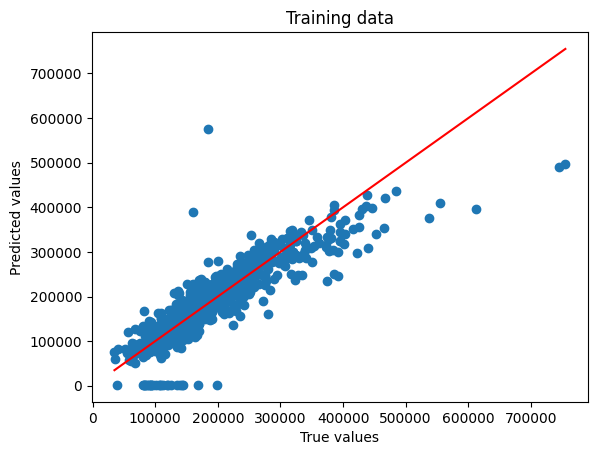

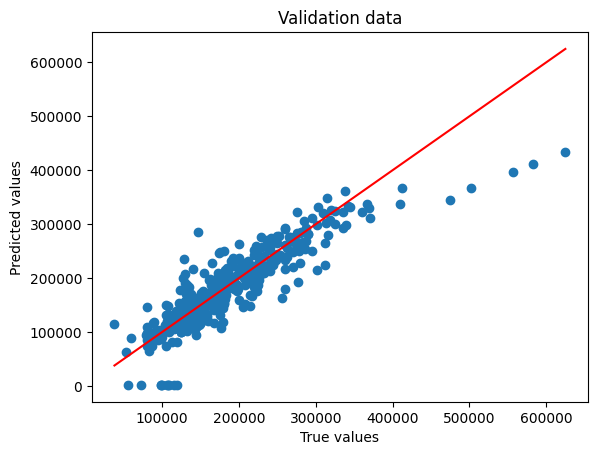

In [16]:
y_train_pred = regressor2.predict(X_train)
y_val_pred = regressor2.predict(X_test)

# Plot predicted values versus true values for training data
plt.scatter(y_train, y_train_pred)
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'r')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

# Plot predicted values versus true values for validation data
plt.scatter(y_test, y_val_pred)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Validation data')
plt.show()

### 13 - Tunear los parámetros de la regresión seleccionada

Se utilizo el modelo 2 de regresion. Tiene un accuracy de 0.705. El cual indica que este es un buen modelo.

In [17]:
# Definir los valores de los parámetros a probar
param_grid = {'hidden_layer_sizes': [(10, 10), (20, 20)],
              'activation': ['relu', 'tanh']}

# Definir el modelo a tunear
regressor2 = MLPRegressor(max_iter=10000, random_state=123, validation_fraction=0.2)

# Reducir el número de iteraciones de validación cruzada
grid_search = GridSearchCV(regressor2, param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")


/home/crislay/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/crislay/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/crislay/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/crislay/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/crislay/.local/lib/python3.10/

Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (20, 20)}
Best accuracy: 0.6659079772218642


### 14 - Comparar la eficiencia del mejor modelo de RNA con los resultados obtenidos con los algoritmos de las hojas de trabajos anteriores.

¿Cuál es mejor para predecir? Ambos modelos dieron buenos resultados de accuracy. En donde difiere los resultados es con la eficiencia de cada unos de los algoritmos

¿Cuál se demoró más en procesar? En este caso los modelos de regresión con redes neuronales donde esta el modelo 1 y 2 se tarde 4 segundos y 15 segundos correspondientemente, el modelo dos a pesar que se tardara más proceso mejor la información dando mejores resultados. En cambio los modelos anteriores como SVM entre 2 y 3 segundos.

### 15 - Comparar los resultados del mejor modelo de esta hoja para clasificar con los resultados de los algoritmos usados para clasificar de las hojas de trabajo anteriores

Considerando los datos de estos modelos y los anteriores se puede apreciar que ambos tienen diferencias notables en su tiempo de ejecución. El modelo de arboles de decisión es uno de los más eficientes a nivel de ejecución que se detecto por el momento.

### 16 - Comparar los resultados del mejor modelo para predecir el precio de venta con los resultados de los algoritmos usados para el mismo propósito de las hojas de trabajo anteriores

#### Resultados del modelo para predir precio de la hoja anterior (SVR):

RMSE: 42993.7

MAE: 20349.84

R cuadrado: 0.7374212

#### Resultados del modelo para predir precio de la hoja anterior (SVR Tuneado):

RMSE: 42993.7

MAE: 20349.84

R cuadrado: 0.7374212

#### Resultados del modelo para predir precio (Modelo 1):

RMSE: 34003.82241543935

MAE: 23530.503999965265

R cuadrado: 0.7664155116189413

#### Resultados del modelo para predir precio (Modelo 2):

RMSE: 29915.899591696594

MAE: 21325.64754370633

R cuadrado: 0.7770905295013287

#### Comparacion:
Como se podra ver en estos resultados el modelo de la hoja anterior nos dio un error de promedio absoluto bajo mientras que la RMSE del modelo 2 es el mas bajo y su R cuadrado es muy alto. Se puede observar que el mejor modelo fue el modelo 2 de esta misma hoja ya que da los mejores resultados y generaliza mucho mejor la información.


### 17 - Conclusiones sobre cuales son los mejores modelos para clasificar dadas características del conjunto de datos. ¿Cuales son los mejores para predecir el precio de las casas?

In [18]:
# Tabla resumen con las métricas de los modelos

### 18 - Informe de los resultados y explicaciones